<h1> Heart Disease prediction model</h1>
<hr></hr>
Scientific paper

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

folder_path = '/content/drive/My Drive/ColabNotebooks/'
os.listdir(folder_path)

sns.set_style('darkgrid')
sns.set_palette('Set2')

file_name = folder_path+'heart.csv'
read_file = pd.read_csv(file_name)
df = pd.DataFrame(read_file)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df1 = df.copy()
df1.shape

(920, 16)

In [5]:
df1.isnull().sum() # is there any missing values

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

<h1>EDA</h1>

In [6]:
df1.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

<Axes: >

<Figure size 2000x3000 with 0 Axes>

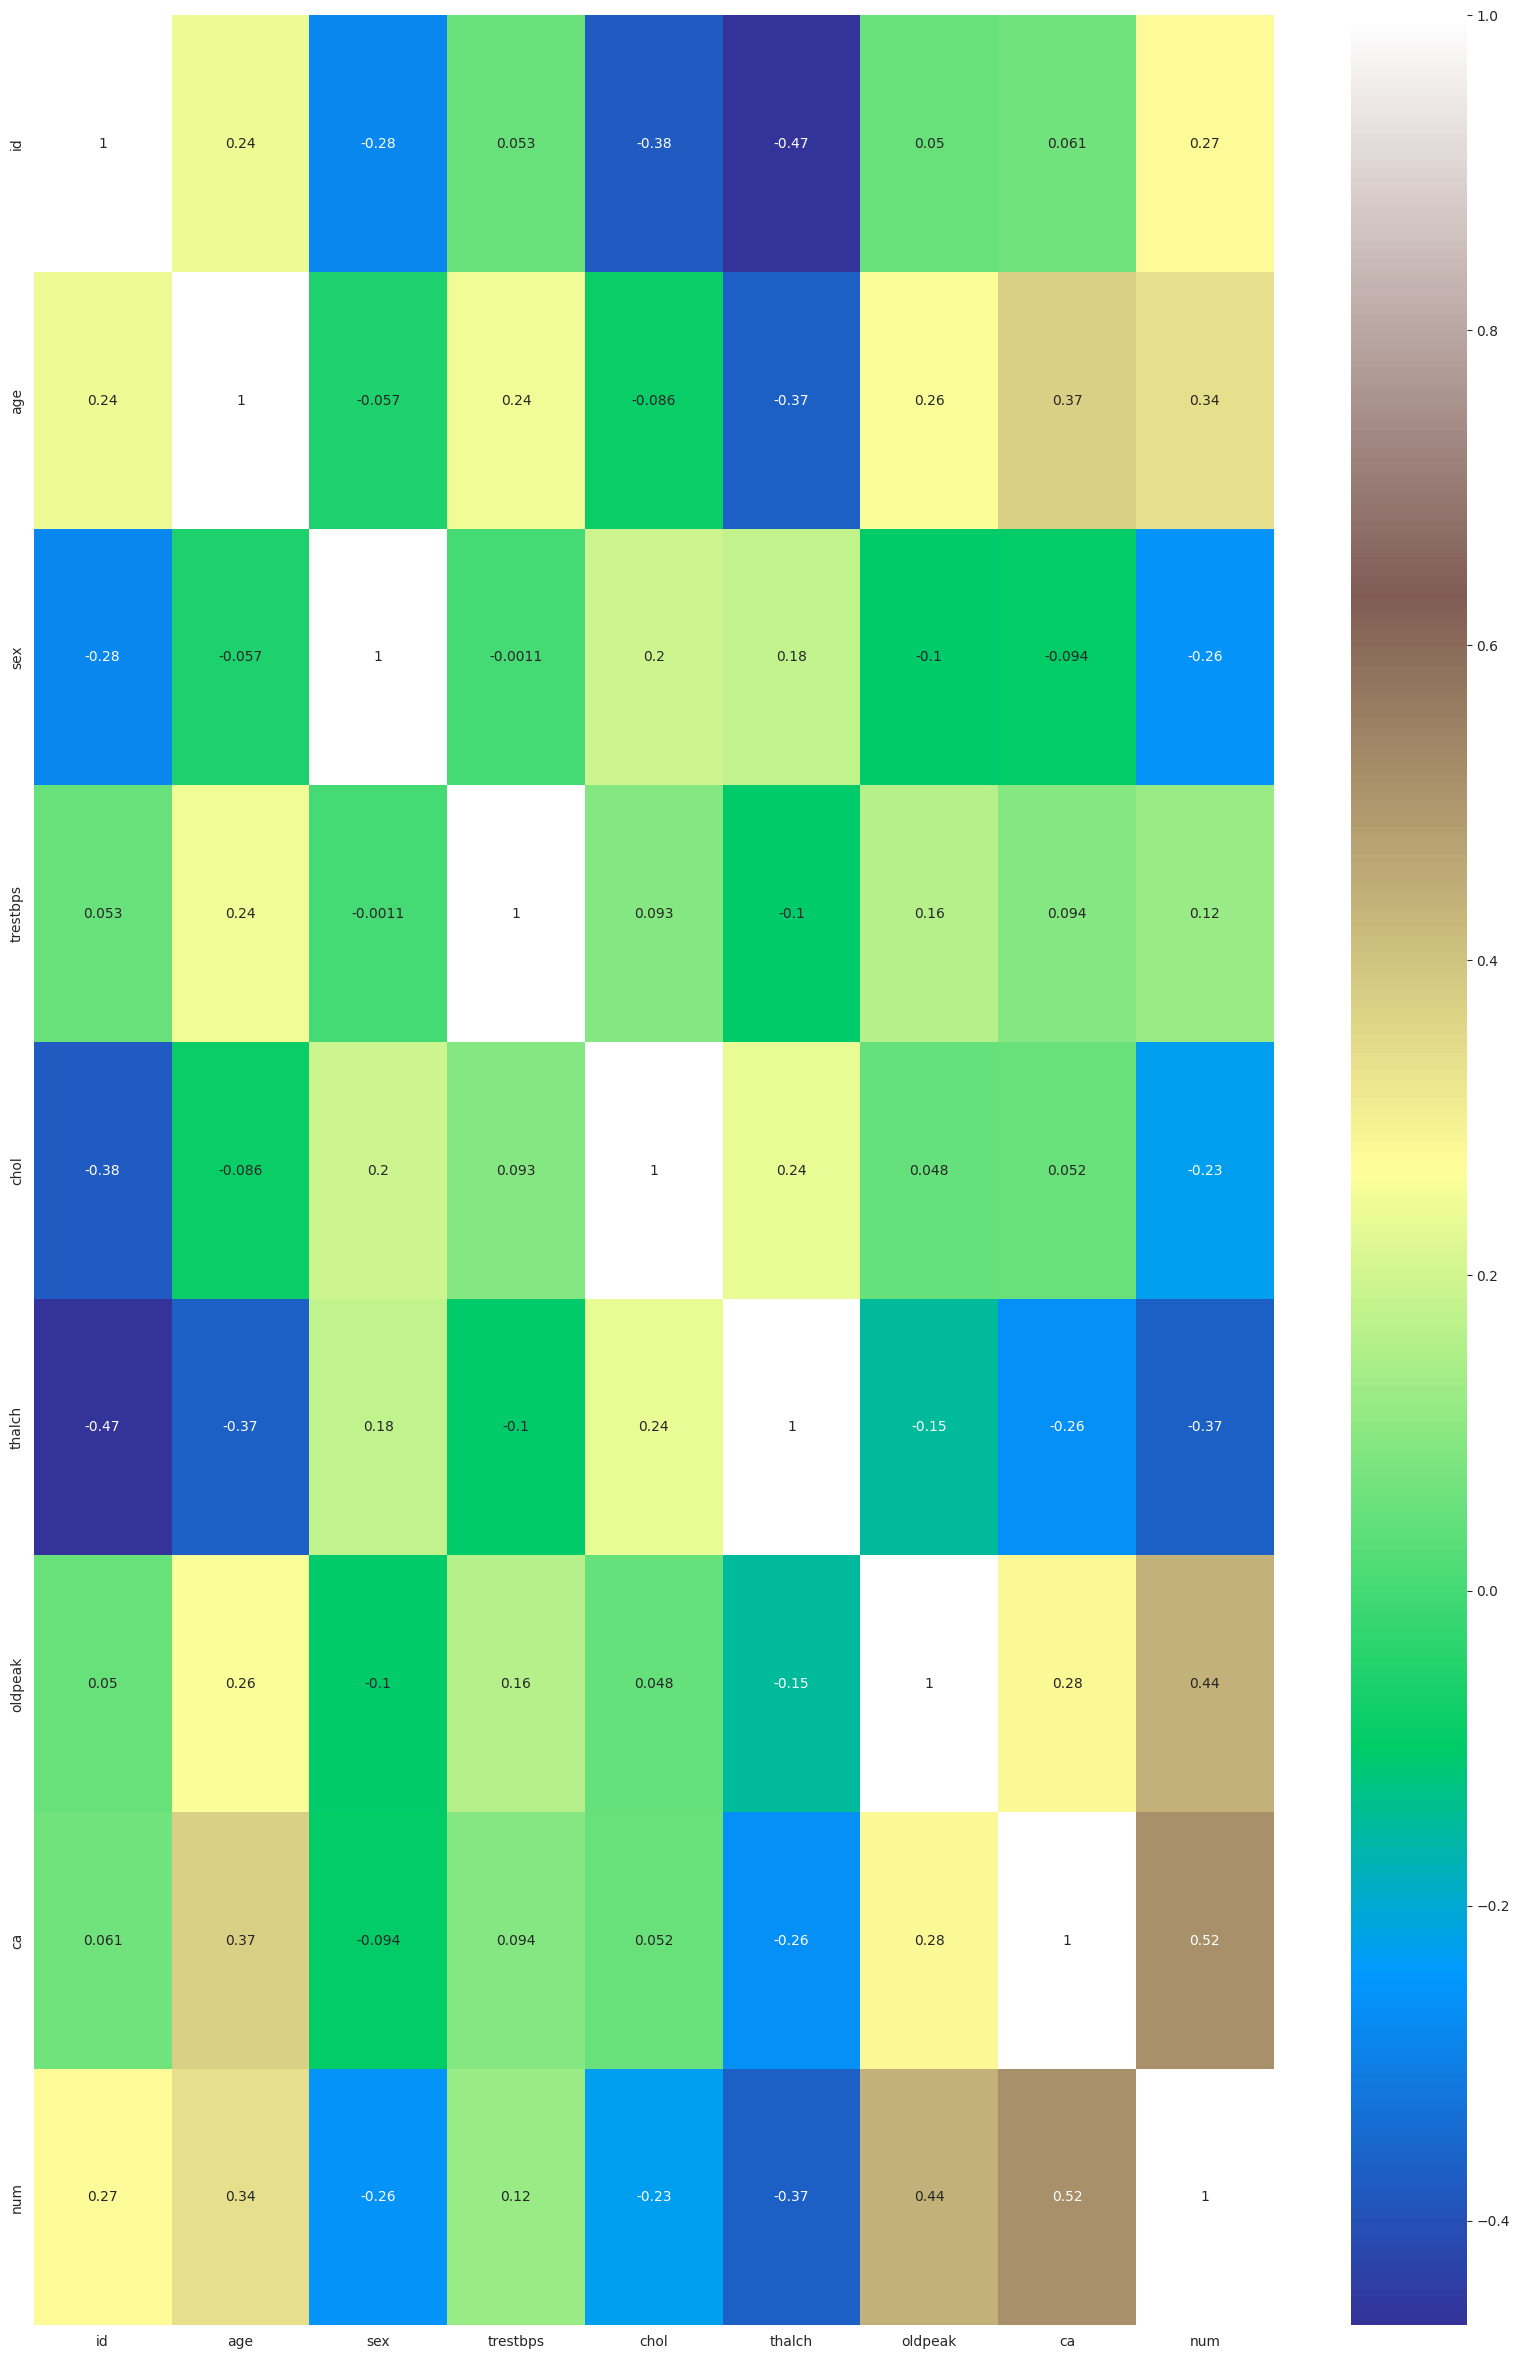

In [7]:
# let see the correlation of these features
plt.figure(figsize=(20,30))

# Convert 'sex' column to numerical representation
df1['sex'] = df1['sex'].map({'Male': 0, 'Female': 1})

# Drop non-numerical columns before calculating correlation
numerical_df1 = df1.select_dtypes(include=['number'])

# let see the correlation of these features
plt.figure(figsize=(20,30))
sns.heatmap(numerical_df1.corr(),annot=True,cmap="terrain")

<p> Detailed Explanation for Key Pairs
age and num:

Correlation: 0.34.
Interpretation: There is a moderate positive relationship between age and num. As age increases, the num variable tends to increase as well.
thalach and num:

Correlation: -0.37.
Interpretation: There is a moderate negative relationship between thalach (maximum heart rate achieved) and num (which might indicate some health condition). As thalach increases, num tends to decrease.
ca and num:

Correlation: 0.52.
Interpretation: There is a strong positive relationship between ca (which might indicate a clinical measurement) and num. Higher values of ca are associated with higher values of num. </p>

In [8]:
df1.describe()

,id,age,sex,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,0.210870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,0.408148,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,0.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,0.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,0.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,1.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


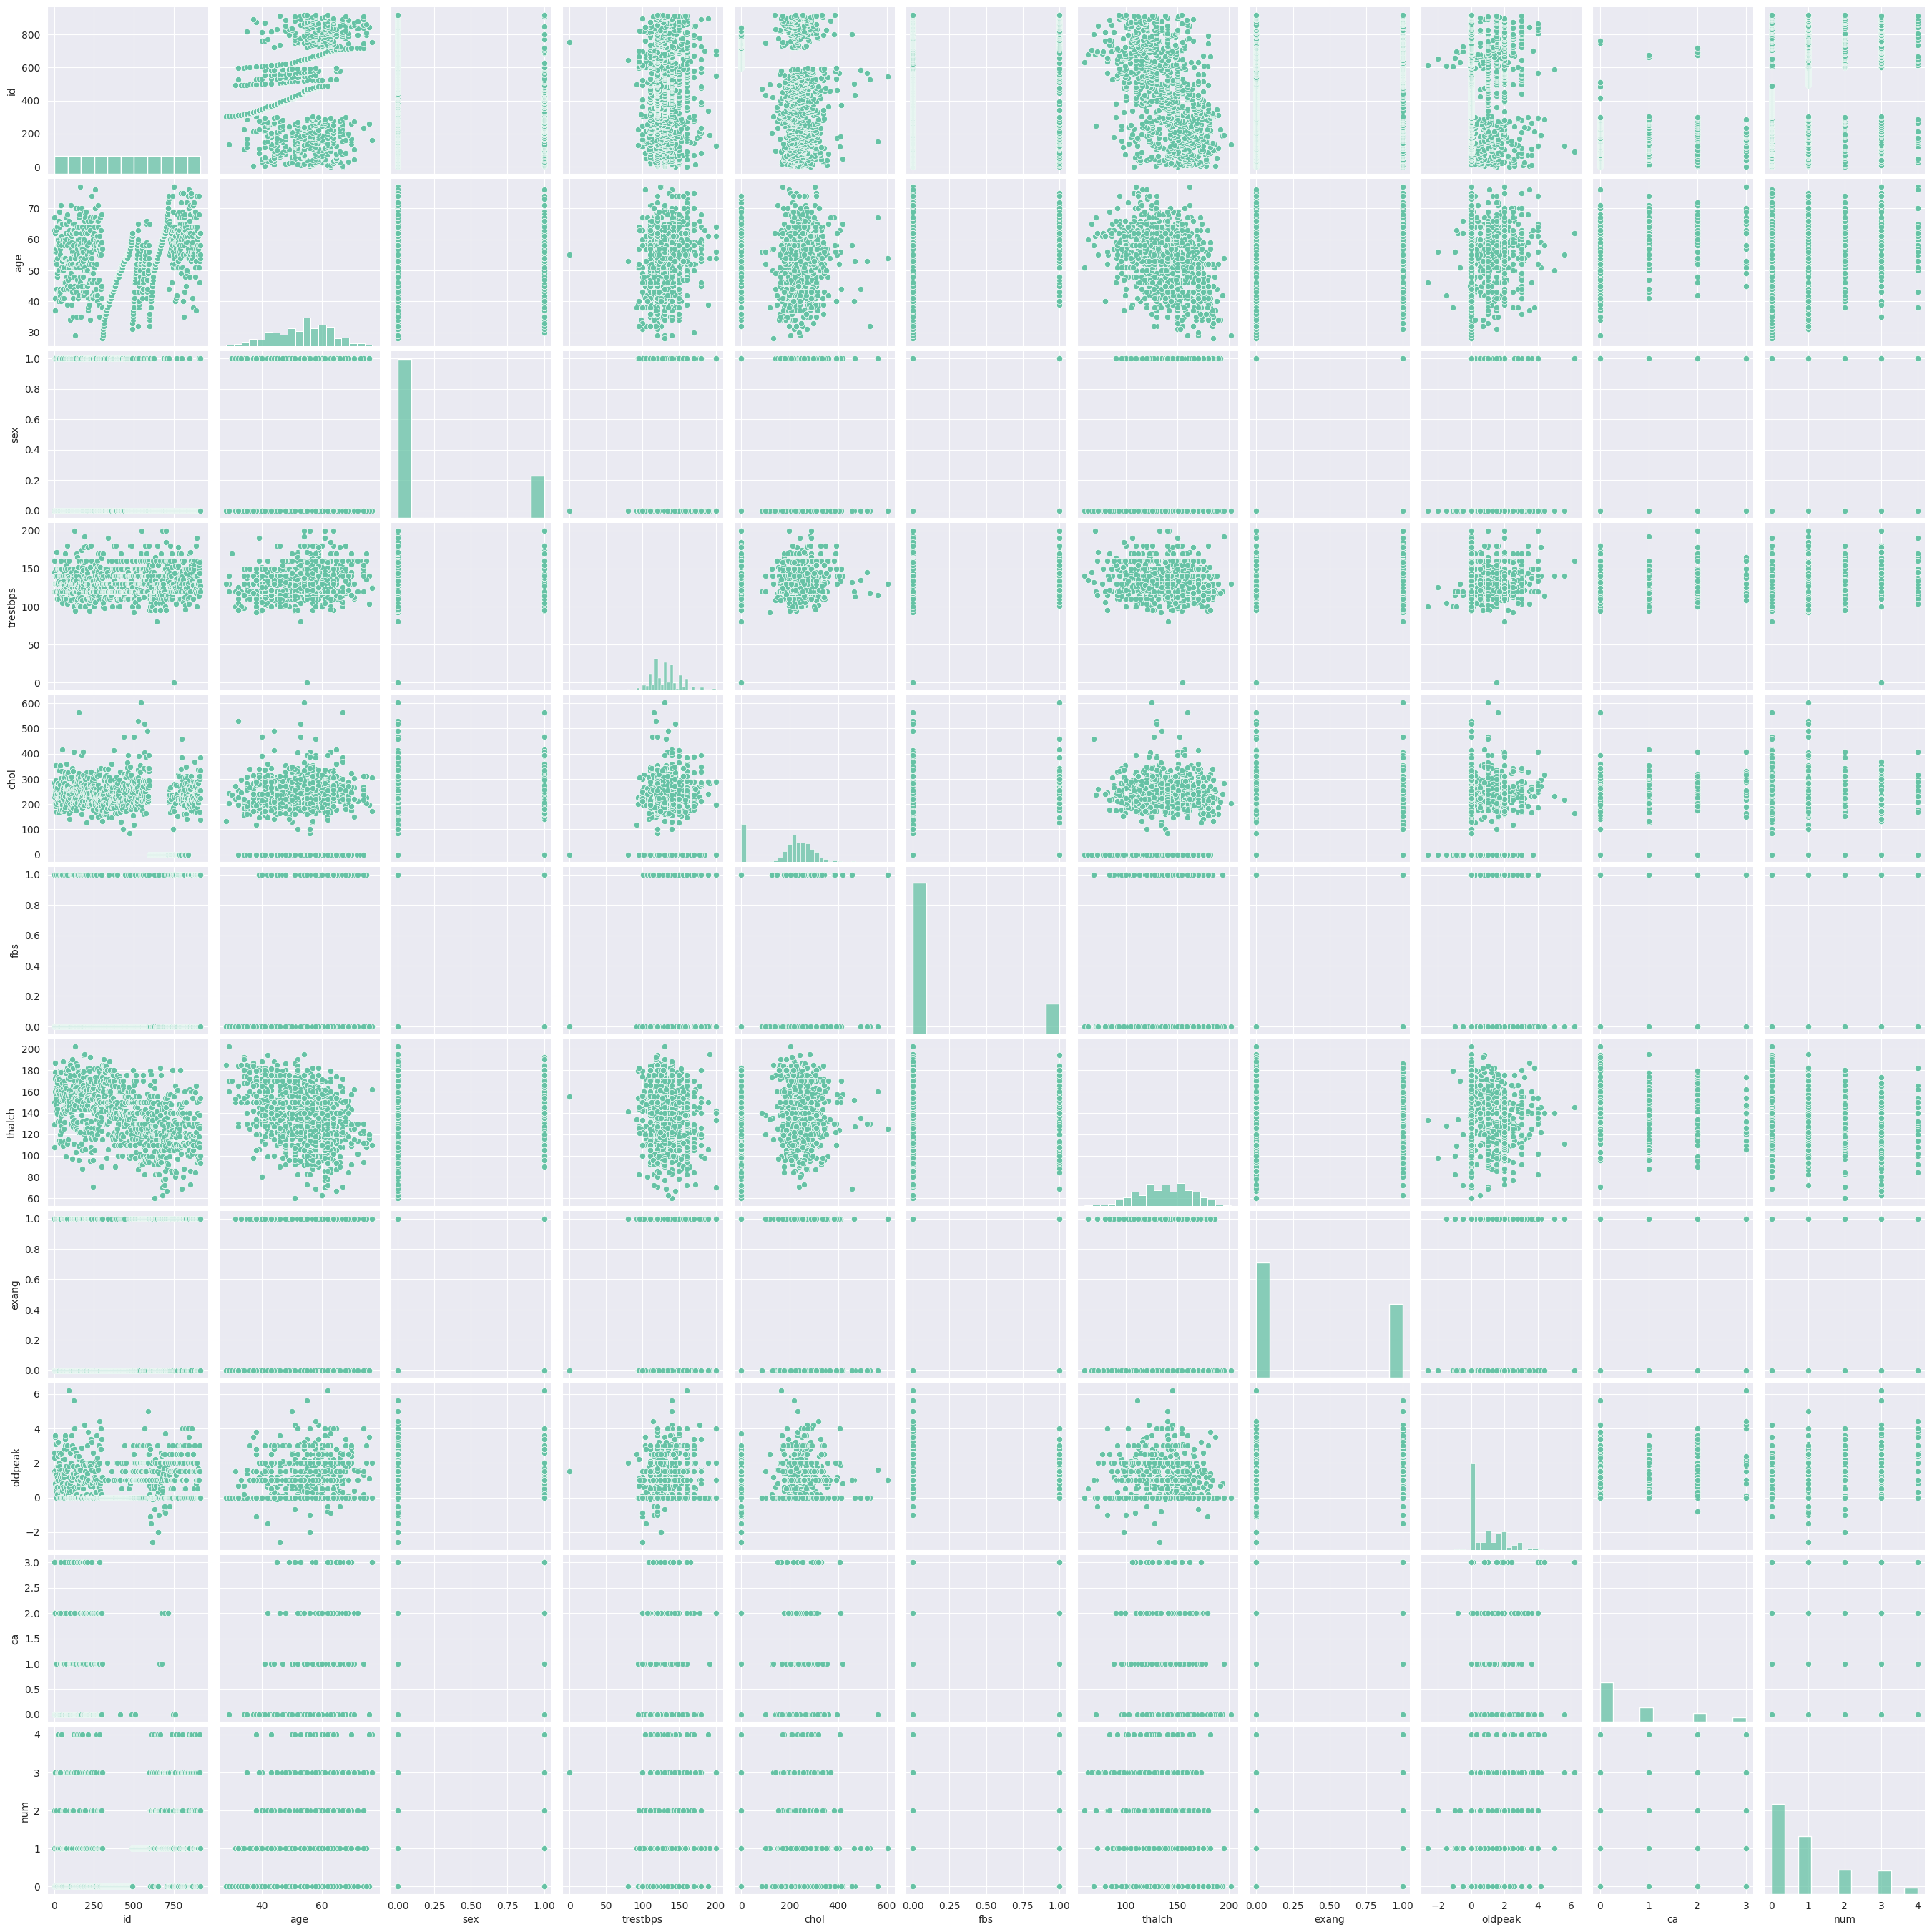

In [9]:
#using pairplot
'''To visualize the relationship between different features and figure out any linear relation between them we take help
of PAIRPLOTS. I will give the link for the code and also the video explaining the data set in the end.'''
sns.pairplot(data=df1)

In [22]:
df1['sex'] .describe()
print('Total number of Males : ',df1.loc[df1['sex'] == 'male'].sex.count())
print('----------------')
print('Total number of Females : ',df1.loc[df1['sex'] == 'female'].sex.count())

Total number of Males :  920
----------------
Total number of Females :  0


<h3> Defining a function for sex </h3>

In [15]:
#classify sex either female  or male
def sex_class(sex):
    if sex == 0 :
        return 'female'
    else:
        return 'male'
df1['sex'] = df1['sex'].apply(sex_class)

# Check if the 'num' column exists before trying to modify it
if 'num' in df1.columns:
    # classify target 0 for no heart disease and 1 for Heart disease
    def num(num):
        if num == 0 :
            return 'No Heart disease'
        else:
            return 'Heart Disease'

    df1['num'] = df1['num'].apply(num)

df1

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,No Heart disease
1,2,67,male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,Heart Disease
2,3,67,male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,Heart Disease
3,4,37,male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,No Heart disease
4,5,41,male,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,No Heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,male,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,Heart Disease
916,917,62,male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,No Heart disease
917,918,55,male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,Heart Disease
918,919,58,male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,No Heart disease


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


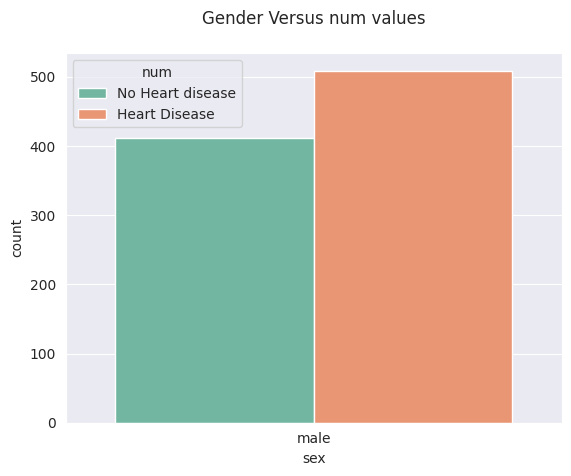

In [20]:
# Check if 'target' column exists and print available columns
print(df1.columns)

# If 'num' is missing, investigate why and recreate it if needed
if 'num' not in df1.columns:
    # classify num 0 for no heart disease and 1 for Heart disease
    def num(num):
        if num == 0 :
            return 'No Heart disease'
        else:
            return 'Heart Disease'

# Assuming the original 'num' column (with numerical values) is still available
    if 'old_num' in df1.columns:  # Replace 'old_target' with the actual column name if different
        df1['num'] = df1['old_num'].apply(num)
    else:
        print("Error: 'num' column not found. You might need to reload the data or regenerate the 'num' column.")

# Proceed with the countplot if 'num' column is available
if 'num' in df1.columns:
    sns.countplot(data= df1, x='sex',hue='num')
    plt.title('Gender Versus num values\n')
    plt.show()

In [21]:
print('Total number of Males : ',df1.loc[df1['sex'] == 'male'].sex.count())
print('----------------')
print('Total number of Females : ',df1.loc[df1['sex'] == 'female'].sex.count())

Total number of Males :  920
----------------
Total number of Females :  0


In [23]:
# Check if 'target' column exists and print available columns
print(df1.columns)

# If 'target' is missing, investigate why and recreate it if needed
if 'target' not in df1.columns:
    # classify target 0 for no heart disease and 1 for Heart disease
    def target(target):
        if target == 0 :
            return 'No Heart disease'
        else:
            return 'Heart Disease'

    # Assuming the original 'target' column (with numerical values) is still available
    if 'old_target' in df1.columns:  # Replace 'old_target' with the actual column name if different
        df1['target'] = df1['old_target'].apply(target)
    else:
        print("Error: 'target' column not found. You might need to reload the data or regenerate the 'target' column.")

# Proceed with the countplot if 'target' column is available
if 'target' in df1.columns:
    sns.displot(data=df1, x='target', rug=True)  # Use 'x' to specify the column for distribution
    plt.title('Target Graph')
    plt.show()

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Error: 'target' column not found. You might need to reload the data or regenerate the 'target' column.


In [24]:
#  let's compare Chest pain vs target
df1['cp'].unique()


array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

Text(0.5, 1.0, 'Chest Pain vs Gender')

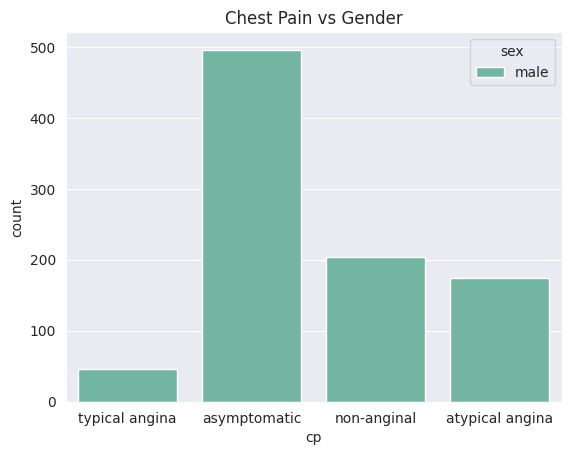

In [25]:
# let's see different chest pain variations vs gender

sns.countplot(data=df1, x='cp', hue='sex')
plt.title('Chest Pain vs Gender')

In [26]:
#  let's compare Chest pain vs target
print(df1.columns) # Check if 'target' is present in the DataFrame

# If 'target' is missing, investigate why and recreate it if needed
if 'target' not in df1.columns:
    # classify target 0 for no heart disease and 1 for Heart disease
    def target(target):
        if target == 0 :
            return 'No Heart disease'
        else:
            return 'Heart Disease'

    # Assuming the original 'target' column (with numerical values) is still available
    if 'old_target' in df1.columns:  # Replace 'old_target' with the actual column name if different
        df1['target'] = df1['old_target'].apply(target)
    else:
        print("Error: 'target' column not found. You might need to reload the data or regenerate the 'target' column.")

# Proceed with the countplot if 'target' column is available
if 'target' in df1.columns:
    sns.countplot(data= df1, x='cp', hue='target' )
    plt.title('Chest Pain vs Target')
    plt.show()
else:
    print("Error: 'target' column still not found. Please check the previous steps.")

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Error: 'target' column not found. You might need to reload the data or regenerate the 'target' column.
Error: 'target' column still not found. Please check the previous steps.


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


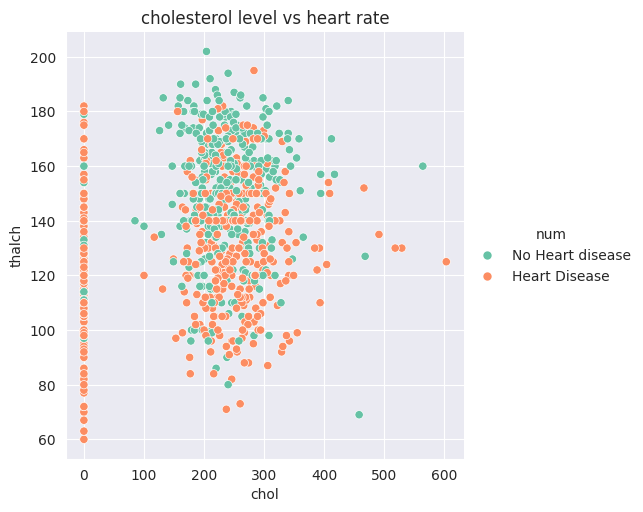

In [31]:
# let's see if there is a relationship between Heart rate and level of cholesterol
print(df1.columns) # Print available columns to verify if 'thalach' exists

# If 'thalach' is not present, correct the column name or reload the data
# Check if 'thalach' is the correct name. If not, replace it with the correct one below
sns.relplot(data=df1,x="chol", y="thalch", hue="num")  # Replace 'thalach' with the correct column name
plt.title('cholesterol level vs heart rate')
plt.show()

Text(0.5, 1.0, 'exercises vs num')

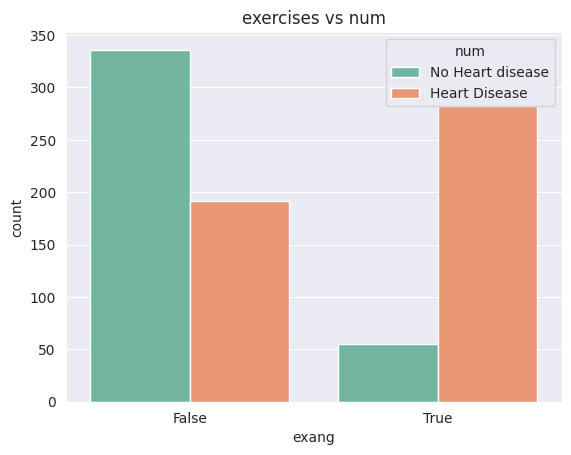

In [32]:
# do exercises makes a person less likely to suffer a heart failure

sns.countplot(data=df1, x='exang', hue='num')
plt.title('exercises vs num')

<h3>Model development - Machine learning algorithms</h3>

<h4>Decision Tree algorhtim </h4>

In [33]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

df2 = df.copy()


In [34]:
x = df2.iloc[:,0:13] #features
y = df2.iloc[:,13] # target

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [40]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder # Add this import for label encoding
import pandas as pd # Import pandas for handling NaNs
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values

df2 = df.copy()

# ... (rest of your code)

x = df2.iloc[:,0:13] #features
y = df2.iloc[:,13] # target

# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
for column in x.columns: # Iterate through all columns in x
    if x[column].dtype == 'object': # Check if the column is of object (string) type
        x[column] = label_encoder.fit_transform(x[column]) # Encode the column

# Handle missing values (NaNs) using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # Replace NaNs with the most frequent value in each column
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns) # Apply imputation and convert back to DataFrame

#Handle NaNs in the target variable 'y'
# Drop rows with NaNs in the target variable
y = y.dropna()
# Align x and y after dropping NaNs from y
x = x.loc[y.index] # Keep only the rows in x that correspond to non-NaN values in y

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train) # classifier
#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4946236559139785


<h2>Implementation of Lazypredict method </h2>

In [42]:
!pip install lazypredict # Install the lazypredict library

#Now, here is how you can use the Lazy Predict Library to check the performance of all classification machine learning models:
from lazypredict.Supervised import LazyClassifier # Now you can import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:01<00:00, 11.82it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 12
[LightGBM] [Info] Start training from score -0.563094
[LightGBM] [Info] Start training from score -1.525131
[LightGBM] [Info] Start training from score -1.941291
[LightGBM] [Info] Start training from score -2.667228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

100%|██████████| 29/29 [00:02<00:00, 12.20it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.62,0.39,None,0.59,0.02
SVC,0.72,0.39,None,0.66,0.04
LinearDiscriminantAnalysis,0.65,0.39,None,0.61,0.05
LogisticRegression,0.65,0.39,None,0.61,0.04
AdaBoostClassifier,0.57,0.39,None,0.57,0.13
ExtraTreeClassifier,0.44,0.37,None,0.46,0.02
Perceptron,0.60,0.37,None,0.56,0.02
RidgeClassifierCV,0.67,0.35,None,0.61,0.03
RidgeClassifier,0.67,0.35,None,0.61,0.06


<h2> Deep learning </h2>

In [49]:
#Let's define a new copy for the dataset

df3 = df1.copy()

# Convert 'sex' column to numerical representation
df3['sex'] = df3['sex'].replace({'male': 0, 'female': 1})  # Replace with appropriate mapping

# Identify columns with string values and convert them to numerical representations
for column in df3.columns:
    if df3[column].dtype == 'object':  # Check if the column is of object type (likely string)
        # Handle missing values (NaN) by
        df3[column].fillna('', inplace=True)  # Replace missing values with empty strings

In [52]:
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

# Impute missing values with the most frequent value for each column
imputer = SimpleImputer(strategy='most_frequent')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Handle missing values in y_train (if any)
y_train = y_train.fillna(y_train.mode()[0]) # Fill missing values with the most frequent value

clf = MLPClassifier(hidden_layer_sizes=(9,8,3), random_state=None,max_iter = 1000, activation = 'relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model (use imputed data)
clf.fit(x_train_imputed, y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset (use imputed data)
ypred=clf.predict(x_test_imputed)

# ... (rest of your code)

Iteration 1, loss = 22.13943457
Iteration 2, loss = 1.98551455
Iteration 3, loss = 1.93133043
Iteration 4, loss = 1.87652872
Iteration 5, loss = 1.82284474
Iteration 6, loss = 1.76886664
Iteration 7, loss = 1.71643839
Iteration 8, loss = 1.66552344
Iteration 9, loss = 1.61522288
Iteration 10, loss = 1.56671720
Iteration 11, loss = 1.51949252
Iteration 12, loss = 1.47349379
Iteration 13, loss = 1.42922487
Iteration 14, loss = 1.38652115
Iteration 15, loss = 1.34512234
Iteration 16, loss = 1.30563576
Iteration 17, loss = 1.26755298
Iteration 18, loss = 1.23142027
Iteration 19, loss = 1.19560019
Iteration 20, loss = 1.16144520
Iteration 21, loss = 1.12919048
Iteration 22, loss = 1.09841408
Iteration 23, loss = 1.06887956
Iteration 24, loss = 1.04118223
Iteration 25, loss = 1.01507856
Iteration 26, loss = 0.98973902
Iteration 27, loss = 0.96628088
Iteration 28, loss = 0.94346722
Iteration 29, loss = 0.92225339
Iteration 30, loss = 0.98029623
Iteration 31, loss = 0.88238766
Iteration 32, lo

In [60]:
#Make Predictions and Evaluate the Model
# Make prediction on test dataset (use imputed data)
ypred=clf.predict(x_test_imputed)  # Use the imputed test data

# Import accuracy score
from sklearn.metrics import accuracy_score

# Handle NaN values in y_test before calculating accuracy
# Reset indices to ensure alignment if you previously dropped rows
y_test_clean = y_test.dropna().reset_index(drop=True)

# Align predictions with cleaned y_test
# Regenerate predictions based on the cleaned data
x_test_imputed_clean = x_test_imputed[0:len(y_test_clean)]  # Subset x_test_imputed to match length of y_test_clean
ypred_clean = clf.predict(x_test_imputed_clean)  # Predict using the aligned imputed data

# Calcuate accuracy using the cleaned data
accuracy_score(y_test_clean, ypred_clean)

0.5568181818181818

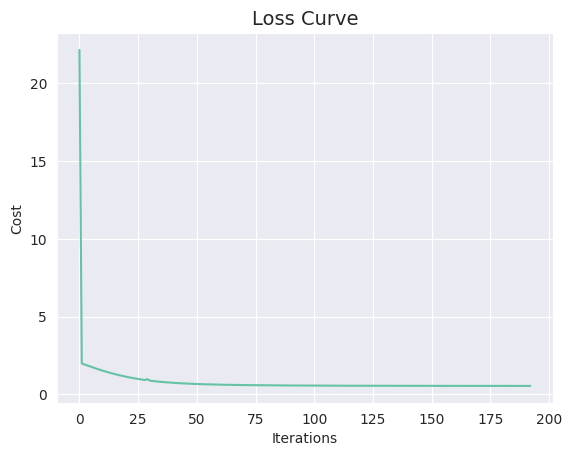

In [61]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [63]:
# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(clf, param_grid, n_jobs= -1, cv=5)
# Use the imputed training data for GridSearchCV
grid.fit(x_train_imputed, y_train)

print(grid.best_params_)

Iteration 1, loss = 13.93155602
Iteration 2, loss = 4.89086642
Iteration 3, loss = 5.22988526
Iteration 4, loss = 2.97118275
Iteration 5, loss = 1.63720260
Iteration 6, loss = 1.16757830
Iteration 7, loss = 1.06408646
Iteration 8, loss = 0.83005361
Iteration 9, loss = 0.70133030
Iteration 10, loss = 0.55059256
Iteration 11, loss = 0.44766980
Iteration 12, loss = 0.49216917
Iteration 13, loss = 0.45599608
Iteration 14, loss = 0.42659906
Iteration 15, loss = 0.53186262
Iteration 16, loss = 0.49725534
Iteration 17, loss = 0.47981101
Iteration 18, loss = 0.45416555
Iteration 19, loss = 0.41852681
Iteration 20, loss = 0.43872374
Iteration 21, loss = 0.40430601
Iteration 22, loss = 0.41672231
Iteration 23, loss = 0.40763233
Iteration 24, loss = 0.42818009
Iteration 25, loss = 0.43942076
Iteration 26, loss = 0.39994678
Iteration 27, loss = 0.38946187
Iteration 28, loss = 0.37101919
Iteration 29, loss = 0.37993768
Iteration 30, loss = 0.37277166
Iteration 31, loss = 0.37191535
Iteration 32, lo

In [67]:
# Hyper Parameter Tuning, continued...

# Impute missing values in x_test
x_test_imputed = imputer.transform(x_test)  # Use the same imputer fitted earlier

grid_predictions = grid.predict(x_test_imputed)  # Use imputed test data for prediction

# Handle NaN values in y_test before calculating accuracy
y_test_clean = y_test.dropna()  # Remove rows with NaN values in y_test

# Align predictions with cleaned y_test, accounting for potential length mismatch
grid_predictions_clean = grid_predictions[0:len(y_test_clean)]  # Subset grid_predictions

print('Accuracy: {:.2f}'.format(accuracy_score(y_test_clean, grid_predictions_clean)))

Accuracy: 0.51


<h2> List of MLPs tests </h2>
<hr>
<h2>MLP test 1 - Relu </h2>

Model Accuracy is :  0.855072463768116


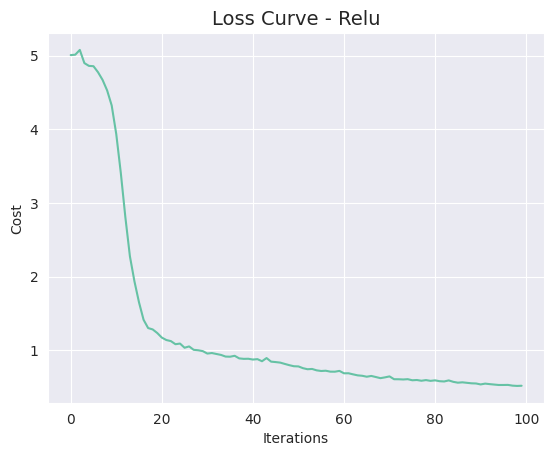

In [85]:
#Let's define a new copy for the dataset

df3 = df1.copy()

# Convert 'sex' column to numerical representation (0 for 'female', 1 for 'male')
df3['sex'] = df3['sex'].map({'female': 0, 'male': 1})

# Identify columns with string values and convert them to numerical representations
for col in df3.columns:
    if df3[col].dtype == 'object':
        unique_values = df3[col].unique()
        mapping = {value: i for i, value in enumerate(unique_values)}
        df3[col] = df3[col].map(mapping)

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle missing values (NaN) using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column
x_train = imputer.fit_transform(x_train)  # Fit and transform on training data

# Impute missing values in the target variable (y_train)
imputer_y = SimpleImputer(strategy='most_frequent')  # Use most frequent for categorical target
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1))  # Fit and transform y_train
y_train = y_train.ravel() # Flatten the array

# Combine x_train and x_test for unified imputation
x_combined = np.vstack((x_train, x_test))

# Fit and Transform the Imputer on the Combined Features
imputer = SimpleImputer(strategy='mean')
x_combined = imputer.fit_transform(x_combined)

# Split the data back into training and test sets
x_train = x_combined[:x_train.shape[0]]
x_test = x_combined[x_train.shape[0]:]

# Impute missing values in the target variable (y_train and y_test)
imputer_y = SimpleImputer(strategy='most_frequent')
y_train = imputer_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Ensure y_test is a NumPy array and impute it
y_test = np.array(y_test)  # Convert to NumPy array if not already
y_test = imputer_y.transform(y_test.reshape(-1, 1)).ravel()

# Verify if any NaNs remain in y_test after imputation
if np.isnan(y_test).any():
    raise ValueError("NaN values still exist in y_test after imputation.")

# Fit the model
clf.fit(x_train, y_train)

# Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
print('Model Accuracy is : ', accuracy_score(y_test, ypred))

# Plot Loss Curve
plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Relu", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Iteration 1, loss = 7.71175535
Iteration 2, loss = 1.59492063
Iteration 3, loss = 1.07644145
Iteration 4, loss = 0.88121917
Iteration 5, loss = 0.74594402
Iteration 6, loss = 0.72330166
Iteration 7, loss = 0.68916500
Iteration 8, loss = 0.68798867
Iteration 9, loss = 0.67143373
Iteration 10, loss = 0.66293516
Iteration 11, loss = 0.65247775
Iteration 12, loss = 0.65050489
Iteration 13, loss = 0.64875736
Iteration 14, loss = 0.64594360
Iteration 15, loss = 0.64100657
Iteration 16, loss = 0.63730945
Iteration 17, loss = 0.61915679
Iteration 18, loss = 0.60660644
Iteration 19, loss = 0.58251477
Iteration 20, loss = 0.55956916
Iteration 21, loss = 0.55367726
Iteration 22, loss = 0.55967772
Iteration 23, loss = 0.56324823
Iteration 24, loss = 0.55217294
Iteration 25, loss = 0.56145485
Iteration 26, loss = 0.54955022
Iteration 27, loss = 0.55343662
Iteration 28, loss = 0.54254208
Iteration 29, loss = 0.55197577
Iteration 30, loss = 0.54119257
Iteration 31, loss = 0.53118168
Iteration 32, los

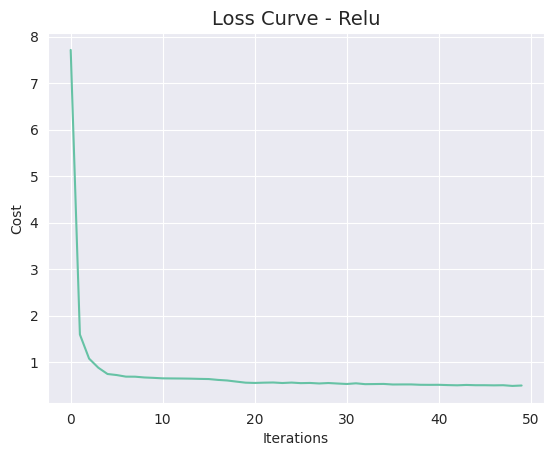

In [89]:
# Let's define a new copy for the dataset
df3 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df3 = pd.get_dummies(df3, drop_first=True)

x = df3.iloc[:, :-1] #features (excluding the target variable)
y = df3.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(14,10,8), random_state=None, max_iter=50, activation='relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Relu", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


<h2> MLP test 2 - Relu</h2>

Iteration 1, loss = 16.40195289
Iteration 2, loss = 7.06435703
Iteration 3, loss = 2.76966242
Iteration 4, loss = 2.44269251
Iteration 5, loss = 2.48858159
Iteration 6, loss = 1.61152068
Iteration 7, loss = 1.30636039
Iteration 8, loss = 1.15924870
Iteration 9, loss = 1.17308667
Iteration 10, loss = 1.12945373
Iteration 11, loss = 0.79514886
Iteration 12, loss = 0.80603721
Iteration 13, loss = 0.93036020
Iteration 14, loss = 0.83804599
Iteration 15, loss = 0.73831253
Iteration 16, loss = 0.67152937
Iteration 17, loss = 0.67810412
Iteration 18, loss = 0.67331957
Iteration 19, loss = 0.64104493
Iteration 20, loss = 0.62021868
Iteration 21, loss = 0.60439791
Iteration 22, loss = 0.59496034
Iteration 23, loss = 0.59171132
Iteration 24, loss = 0.59065217
Iteration 25, loss = 0.58786806
Iteration 26, loss = 0.59864715
Iteration 27, loss = 0.59127761
Iteration 28, loss = 0.58723861
Iteration 29, loss = 0.60251429
Iteration 30, loss = 0.60174617
Iteration 31, loss = 0.60614325
Iteration 32, lo

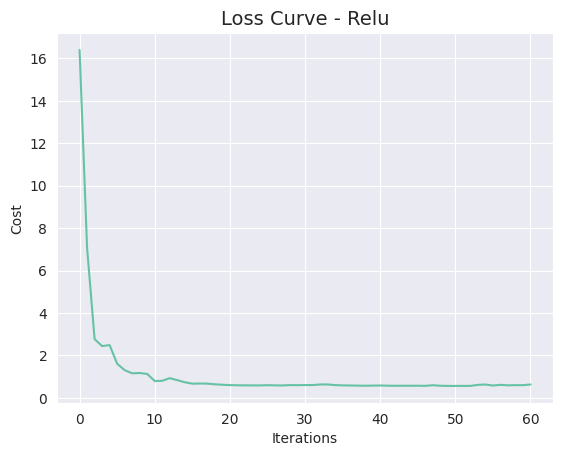

In [90]:
# Let's define a new copy for the dataset
df4 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df4 = pd.get_dummies(df4, drop_first=True)

x = df4.iloc[:, :-1] #features (excluding the target variable)
y = df4.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(15,10,8), random_state=None, max_iter=100, activation='relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Relu", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


<h2> MLP test 3 - Relu</h2>

Iteration 1, loss = 7.15554493
Iteration 2, loss = 2.69470556
Iteration 3, loss = 1.61265675
Iteration 4, loss = 1.35727880
Iteration 5, loss = 1.10069945
Iteration 6, loss = 0.80926365
Iteration 7, loss = 0.68508627
Iteration 8, loss = 0.74222154
Iteration 9, loss = 0.74054522
Iteration 10, loss = 0.66990477
Iteration 11, loss = 0.57427340
Iteration 12, loss = 0.61354907
Iteration 13, loss = 0.51764689
Iteration 14, loss = 0.50604889
Iteration 15, loss = 0.48841501
Iteration 16, loss = 0.48978240
Iteration 17, loss = 0.48451839
Iteration 18, loss = 0.48006911
Iteration 19, loss = 0.48478785
Iteration 20, loss = 0.47333432
Iteration 21, loss = 0.49022884
Iteration 22, loss = 0.47123533
Iteration 23, loss = 0.45873560
Iteration 24, loss = 0.46080312
Iteration 25, loss = 0.45137295
Iteration 26, loss = 0.45322893
Iteration 27, loss = 0.46608604
Iteration 28, loss = 0.47430621
Iteration 29, loss = 0.46526707
Iteration 30, loss = 0.49503141
Iteration 31, loss = 0.45353447
Iteration 32, los

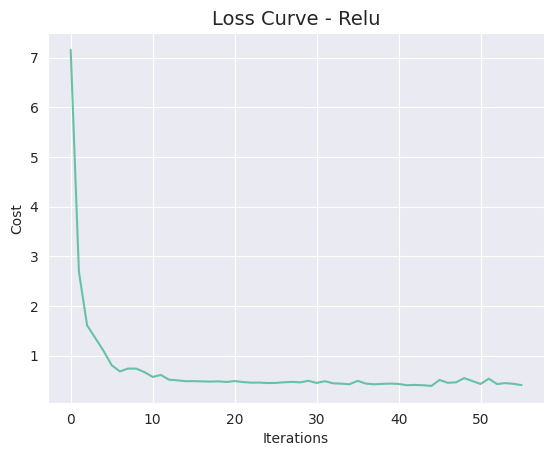

In [91]:
# Let's define a new copy for the dataset
df3 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df3 = pd.get_dummies(df3, drop_first=True)

x = df3.iloc[:, :-1] #features (excluding the target variable)
y = df3.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(20,15,12), random_state=None, max_iter=150, activation='relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Relu", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


<h2> MLP test 1 - Tanh

Iteration 1, loss = 0.66276168
Iteration 2, loss = 0.62590725
Iteration 3, loss = 0.59714192
Iteration 4, loss = 0.57599426
Iteration 5, loss = 0.57195074
Iteration 6, loss = 0.56209086
Iteration 7, loss = 0.55773997
Iteration 8, loss = 0.55115148
Iteration 9, loss = 0.54873363
Iteration 10, loss = 0.56877276
Iteration 11, loss = 0.57987785
Iteration 12, loss = 0.57777339
Iteration 13, loss = 0.56447361
Iteration 14, loss = 0.56166797
Iteration 15, loss = 0.55802663
Iteration 16, loss = 0.55391664
Iteration 17, loss = 0.55344898
Iteration 18, loss = 0.54997135
Iteration 19, loss = 0.54575341
Iteration 20, loss = 0.58555441
Iteration 21, loss = 0.58069259
Iteration 22, loss = 0.56676628
Iteration 23, loss = 0.54527718
Iteration 24, loss = 0.54759827
Iteration 25, loss = 0.54466545
Iteration 26, loss = 0.53292199
Iteration 27, loss = 0.54181292
Iteration 28, loss = 0.56998582
Iteration 29, loss = 0.54366529
Iteration 30, loss = 0.53315386
Iteration 31, loss = 0.52689313
Iteration 32, los

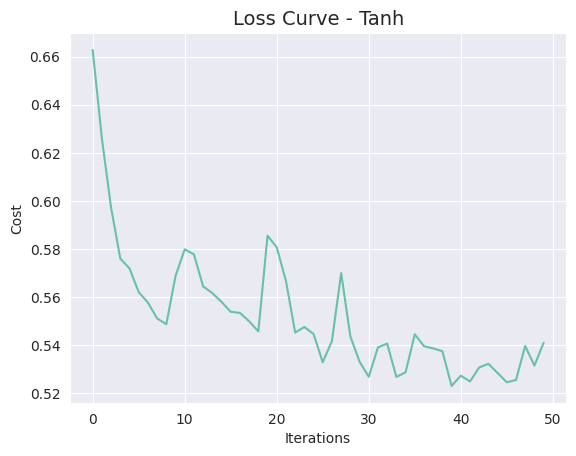

In [92]:
# Let's define a new copy for the dataset
df3 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df3 = pd.get_dummies(df3, drop_first=True)

x = df3.iloc[:, :-1] #features (excluding the target variable)
y = df3.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(14,10,8), random_state=None, max_iter=50, activation='tanh', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Tanh", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h2> MLP test 2 - Tanh</h2>

Iteration 1, loss = 0.62783712
Iteration 2, loss = 0.58477721
Iteration 3, loss = 0.55486042
Iteration 4, loss = 0.54352006
Iteration 5, loss = 0.54565015
Iteration 6, loss = 0.53188296
Iteration 7, loss = 0.53733275
Iteration 8, loss = 0.53509787
Iteration 9, loss = 0.51387246
Iteration 10, loss = 0.52202668
Iteration 11, loss = 0.51972601
Iteration 12, loss = 0.52434622
Iteration 13, loss = 0.52303360
Iteration 14, loss = 0.52368504
Iteration 15, loss = 0.50436575
Iteration 16, loss = 0.52381030
Iteration 17, loss = 0.51183200
Iteration 18, loss = 0.51229049
Iteration 19, loss = 0.51549271
Iteration 20, loss = 0.49779133
Iteration 21, loss = 0.49082084
Iteration 22, loss = 0.49892628
Iteration 23, loss = 0.48646708
Iteration 24, loss = 0.49169085
Iteration 25, loss = 0.49069462
Iteration 26, loss = 0.51010946
Iteration 27, loss = 0.50105251
Iteration 28, loss = 0.49136311
Iteration 29, loss = 0.48829768
Iteration 30, loss = 0.47772960
Iteration 31, loss = 0.49143834
Iteration 32, los

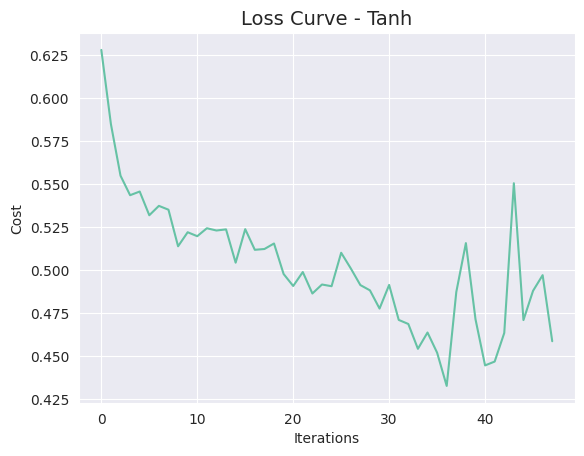

In [93]:
# Let's define a new copy for the dataset
df3 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df3 = pd.get_dummies(df3, drop_first=True)

x = df3.iloc[:, :-1] #features (excluding the target variable)
y = df3.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(15,10,8), random_state=None, max_iter=100, activation='tanh', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Tanh", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h2> MLP Test 3 - Tanh</h2>

Iteration 1, loss = 0.64298399
Iteration 2, loss = 0.58749467
Iteration 3, loss = 0.58663338
Iteration 4, loss = 0.57209697
Iteration 5, loss = 0.56917601
Iteration 6, loss = 0.57047022
Iteration 7, loss = 0.55988290
Iteration 8, loss = 0.56826409
Iteration 9, loss = 0.55664727
Iteration 10, loss = 0.55936585
Iteration 11, loss = 0.54933302
Iteration 12, loss = 0.54684400
Iteration 13, loss = 0.54371795
Iteration 14, loss = 0.52270936
Iteration 15, loss = 0.52692545
Iteration 16, loss = 0.53006920
Iteration 17, loss = 0.53751441
Iteration 18, loss = 0.53487305
Iteration 19, loss = 0.51633937
Iteration 20, loss = 0.52417069
Iteration 21, loss = 0.52174459
Iteration 22, loss = 0.53942747
Iteration 23, loss = 0.56904087
Iteration 24, loss = 0.54564484
Iteration 25, loss = 0.48677499
Iteration 26, loss = 0.50620198
Iteration 27, loss = 0.50729841
Iteration 28, loss = 0.49504810
Iteration 29, loss = 0.49035329
Iteration 30, loss = 0.48649850
Iteration 31, loss = 0.48497205
Iteration 32, los

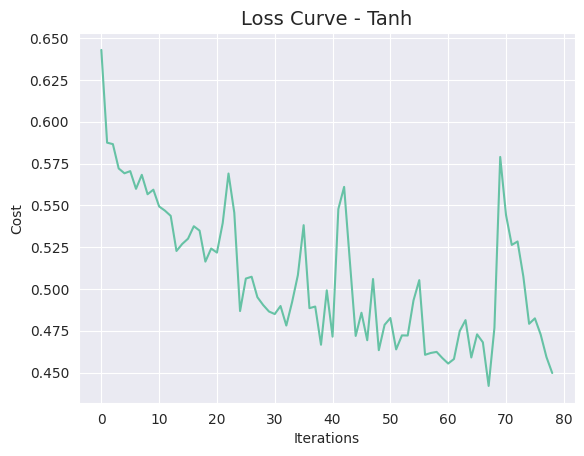

In [94]:
# Let's define a new copy for the dataset
df3 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df3 = pd.get_dummies(df3, drop_first=True)

x = df3.iloc[:, :-1] #features (excluding the target variable)
y = df3.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(20,15,12), random_state=None, max_iter=150, activation='tanh', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Tanh", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h2> MLP test 1 - Logistic Regression activation function </h2>

Iteration 1, loss = 0.73368984
Iteration 2, loss = 0.69653958
Iteration 3, loss = 0.68350918
Iteration 4, loss = 0.68511127
Iteration 5, loss = 0.68966088
Iteration 6, loss = 0.68728658
Iteration 7, loss = 0.68215671
Iteration 8, loss = 0.67718336
Iteration 9, loss = 0.67466212
Iteration 10, loss = 0.67270993
Iteration 11, loss = 0.66807653
Iteration 12, loss = 0.66218088
Iteration 13, loss = 0.65679077
Iteration 14, loss = 0.64634245
Iteration 15, loss = 0.64161517
Iteration 16, loss = 0.63416715
Iteration 17, loss = 0.61931356
Iteration 18, loss = 0.60988367
Iteration 19, loss = 0.59362509
Iteration 20, loss = 0.58339850
Iteration 21, loss = 0.56747073
Iteration 22, loss = 0.55590997
Iteration 23, loss = 0.55150218
Iteration 24, loss = 0.54668310
Iteration 25, loss = 0.53948944
Iteration 26, loss = 0.53265971
Iteration 27, loss = 0.52657618
Iteration 28, loss = 0.53960871
Iteration 29, loss = 0.54515407
Iteration 30, loss = 0.52808278
Iteration 31, loss = 0.53157438
Iteration 32, los

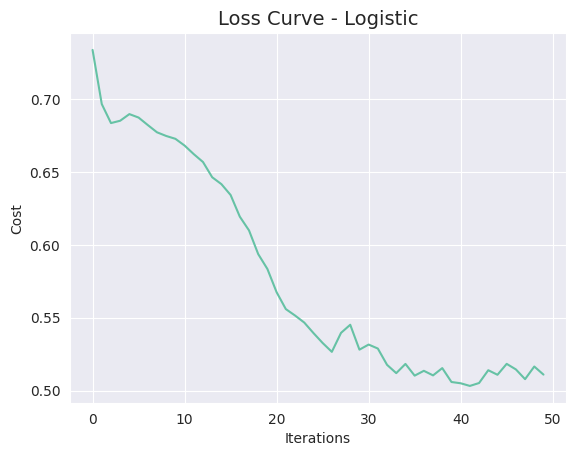

In [95]:
# Let's define a new copy for the dataset
df3 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df3 = pd.get_dummies(df3, drop_first=True)

x = df3.iloc[:, :-1] #features (excluding the target variable)
y = df3.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(14,10,8), random_state=None, max_iter=50, activation='logistic', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Logistic", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


<h2> MLP test 2 - Logistic Regression activation function </h2>

Iteration 1, loss = 0.68817040
Iteration 2, loss = 0.68350858
Iteration 3, loss = 0.68280232
Iteration 4, loss = 0.67952125
Iteration 5, loss = 0.67771841
Iteration 6, loss = 0.67456928
Iteration 7, loss = 0.67074031
Iteration 8, loss = 0.66447335
Iteration 9, loss = 0.65484425
Iteration 10, loss = 0.64356769
Iteration 11, loss = 0.62772932
Iteration 12, loss = 0.60936426
Iteration 13, loss = 0.59376661
Iteration 14, loss = 0.58282202
Iteration 15, loss = 0.56358397
Iteration 16, loss = 0.55436371
Iteration 17, loss = 0.55028820
Iteration 18, loss = 0.54399332
Iteration 19, loss = 0.53923883
Iteration 20, loss = 0.53778460
Iteration 21, loss = 0.53441685
Iteration 22, loss = 0.53163295
Iteration 23, loss = 0.53140450
Iteration 24, loss = 0.52509791
Iteration 25, loss = 0.53527125
Iteration 26, loss = 0.53772209
Iteration 27, loss = 0.53503328
Iteration 28, loss = 0.53471879
Iteration 29, loss = 0.55866706
Iteration 30, loss = 0.52562484
Iteration 31, loss = 0.54665459
Iteration 32, los

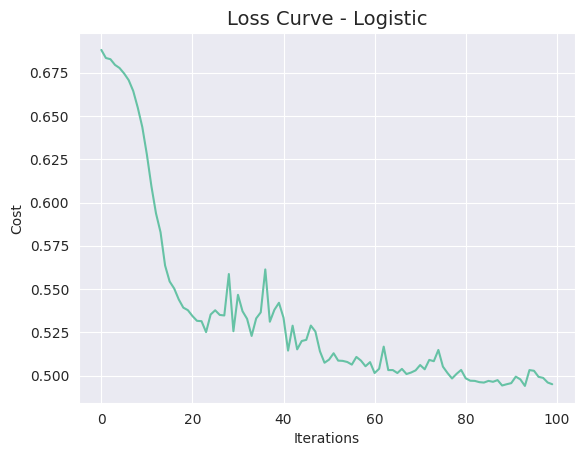

In [96]:
# Let's define a new copy for the dataset
df3 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df3 = pd.get_dummies(df3, drop_first=True)

x = df3.iloc[:, :-1] #features (excluding the target variable)
y = df3.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(15,10,8), random_state=None, max_iter=100, activation='logistic', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Logistic", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


<h2> MLP test 3 - Logistic Regression activation function </h2>

Iteration 1, loss = 0.68403385
Iteration 2, loss = 0.67756699
Iteration 3, loss = 0.66706187
Iteration 4, loss = 0.65109021
Iteration 5, loss = 0.62971178
Iteration 6, loss = 0.60291222
Iteration 7, loss = 0.58424922
Iteration 8, loss = 0.56505291
Iteration 9, loss = 0.55918556
Iteration 10, loss = 0.55600619
Iteration 11, loss = 0.55786478
Iteration 12, loss = 0.54493629
Iteration 13, loss = 0.54193627
Iteration 14, loss = 0.54197047
Iteration 15, loss = 0.53961947
Iteration 16, loss = 0.53944175
Iteration 17, loss = 0.53565919
Iteration 18, loss = 0.53323218
Iteration 19, loss = 0.53058874
Iteration 20, loss = 0.53291859
Iteration 21, loss = 0.52729466
Iteration 22, loss = 0.52764556
Iteration 23, loss = 0.51947761
Iteration 24, loss = 0.51913378
Iteration 25, loss = 0.51404520
Iteration 26, loss = 0.51593730
Iteration 27, loss = 0.51292862
Iteration 28, loss = 0.51042858
Iteration 29, loss = 0.50927751
Iteration 30, loss = 0.52387696
Iteration 31, loss = 0.51233867
Iteration 32, los

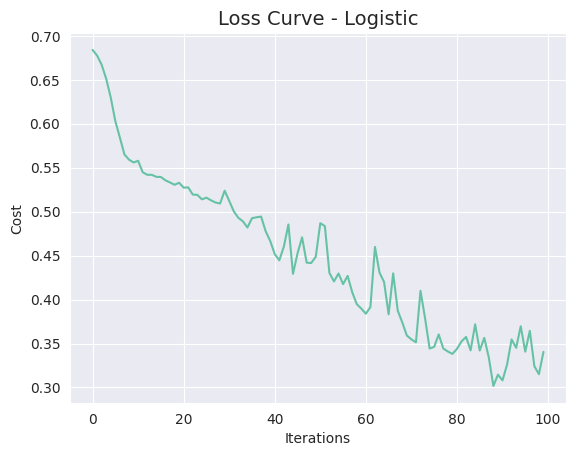

In [97]:
# Let's define a new copy for the dataset
df3 = df1.copy()

# Convert categorical features to numerical using one-hot encoding
df3 = pd.get_dummies(df3, drop_first=True)

x = df3.iloc[:, :-1] #features (excluding the target variable)
y = df3.iloc[:, -1] # target (last column)

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or another strategy based on your data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Build Classification Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(20,15,12), random_state=None, max_iter=150, activation='logistic', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train, y_train)

#Make Predictions and Evaluate the Model
ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Logistic", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


# **1. Model Evaluation and Refinement:**
## 1.1. Cross-Validation: Implement k-fold cross-validation to get a more robust estimate of your models' performance on unseen data. This helps avoid overfitting and provides a better understanding of how your models generalize.

In [98]:
# 1. Cross-Validation:
from sklearn.model_selection import cross_val_score, KFold

# Assuming 'clf' is your best MLP model from the previous steps
cv = KFold(n_splits=5, shuffle=True, random_state=0)  # 5-fold cross-validation
scores = cross_val_score(clf, x_train_imputed, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Accuracy Standard Deviation:", scores.std())


Iteration 1, loss = 0.69144739
Iteration 2, loss = 0.68248082
Iteration 3, loss = 0.68280020
Iteration 4, loss = 0.68044857
Iteration 5, loss = 0.67509895
Iteration 6, loss = 0.67006035
Iteration 7, loss = 0.66208619
Iteration 8, loss = 0.65122062
Iteration 9, loss = 0.63981329
Iteration 10, loss = 0.62480180
Iteration 11, loss = 0.60953740
Iteration 12, loss = 0.59560548
Iteration 13, loss = 0.57890873
Iteration 14, loss = 0.57129639
Iteration 15, loss = 0.57331573
Iteration 16, loss = 0.56326591
Iteration 17, loss = 0.55025770
Iteration 18, loss = 0.54616983
Iteration 19, loss = 0.54011848
Iteration 20, loss = 0.54015298
Iteration 21, loss = 0.53413872
Iteration 22, loss = 0.52870660
Iteration 23, loss = 0.52245512
Iteration 24, loss = 0.51933227
Iteration 25, loss = 0.51278930
Iteration 26, loss = 0.52002834
Iteration 27, loss = 0.49677585
Iteration 28, loss = 0.50385754
Iteration 29, loss = 0.49812328
Iteration 30, loss = 0.49462186
Iteration 31, loss = 0.48573715
Iteration 32, los

# **1. Model Evaluation and Refinement (cont.):**
## 1.2. Hyperparameter Tuning (Continued): Explore a wider range of hyperparameters, including different optimizers (e.g., 'lbfgs'), regularization techniques (e.g., 'l1', 'l2' penalties), and learning rate schedules. Consider using more advanced techniques like Bayesian optimization for more efficient hyperparameter search.

In [99]:
from sklearn.model_selection import GridSearchCV

# Define a broader parameter grid
param_grid = {
    'hidden_layer_sizes': [(150, 100, 50), (100, 50, 25), (50, 25, 10)],
    'max_iter': [100, 200, 300],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}

grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_imputed, y_train)  # Use imputed training data

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Iteration 1, loss = 11.87620773
Iteration 2, loss = 10.89028817
Iteration 3, loss = 4.58829898
Iteration 4, loss = 3.85969064
Iteration 5, loss = 2.56357338
Iteration 6, loss = 1.44806431
Iteration 7, loss = 0.95226814
Iteration 8, loss = 0.74789411
Iteration 9, loss = 0.72434437
Iteration 10, loss = 0.72394643
Iteration 11, loss = 0.67113726
Iteration 12, loss = 0.59990445
Iteration 13, loss = 0.61688235
Iteration 14, loss = 0.54501216
Iteration 15, loss = 0.58825804
Iteration 16, loss = 0.53979944
Iteration 17, loss = 0.55189907
Iteration 18, loss = 0.49200248
Iteration 19, loss = 0.47268883
Iteration 20, loss = 0.48367189
Iteration 21, loss = 0.50693795
Iteration 22, loss = 0.45658002
Iteration 23, loss = 0.45455364
Iteration 24, loss = 0.47402599
Iteration 25, loss = 0.44260082
Iteration 26, loss = 0.43239920
Iteration 27, loss = 0.42857441
Iteration 28, loss = 0.42483101
Iteration 29, loss = 0.42019269
Iteration 30, loss = 0.41075664
Iteration 31, loss = 0.43098353
Iteration 32, l

In [104]:
import joblib
import os
folder_path = '/content/drive/My Drive/ColabNotebooks/'
os.chdir(folder_path)

# Now save the model
model_filename = "best_heart_disease_model.pkl"
best_clf = grid_search.best_estimator_
joblib.dump(best_clf, model_filename)

['best_heart_disease_model.pkl']

In [109]:
! pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
